Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "James Hill"
COLLABORATORS = ""

---

#### Bio3360 Assignment 10##

#### ***** Due Friday March 15 at 7pm *****  but you should be able to finish in class ####



...


## Modeling stochastic processes II: cellular automata and Markov chains ##

<br>

This last assignment will introduce you to a few additional examples of stochastic modeling, and mostly provides you with some code to experiment with, and hopefully add a few more coding approaches to your modeling toolbox.

### More random walks: genetic drift ###

In the previous assignment, we introduced the idea of a random walk in 1D and 2D. We often think of these "walks" as occuring in real space (e.g. associated with diffusion processes, foraging, etc) but they can involve other "spaces". One example of this is in population genetics and the concept of genetic drift.

A simple version of this problem involves a gene (Mendelian locus) with two alleles (e.g. $A$ and $a$) in a given (diploid) population. We can assume a certain allele frequency (i.e. Prob(A)=0.6 and Prob(a)=0.4) across the population. The question is whether the allele frequencies change over generations assuming random mating (i.e. random sampling from the population).

The code below presents one way to explore this question. Read it over and determine how the parameters that affect "sampling" change the frequency of allele A:  *population_size* (size of the gene pool) and *num_zygotes* (number of individuals in the population).


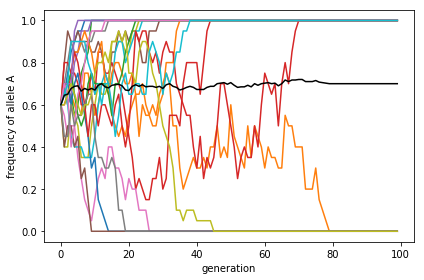

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# assume that allele A is 1 and allele a is 0
# initial allele frequencies
prob_A=0.6
prob_a=1-prob_A

trialnum=20 # number of evolutionary "experiments"
population_size=100 # size of gene pool, total number of allele copies in a generation
num_gen=100 # number of generations

num_zygotes=10 # individuals in the next generation, from matings in the current one
num_gametes=10  # added to gene pool by each individual

numA=prob_A*population_size  # number of A in population
allele_freq_mean=np.zeros(num_gen) # initialize array for mean

plt.figure(1)
plt.clf()

for trial in range(trialnum):
    
    gene_pool=np.zeros(population_size) # intialize all to a (i.e. 0)
    gene_pool[0:int(numA)]=1  # then set values for A (i.e. 1)
    
    # set up an array to store allele frequency over generations
    allele_freq=np.zeros(num_gen) # over time
    allele_freq[0]=prob_A  # initial frequency
    
    for t in range(1,num_gen):
        
        # random combinations of two, ***NOTE that you could also do this with a loop ***
        gene_pool1=np.random.permutation(gene_pool) #shuffle one, sperm
        gene_pool2=np.random.permutation(gene_pool) #shuffle two, eggs
        
        #combine for zygotes
        gamete_gene_pool=np.concatenate((gene_pool1[0:num_zygotes],gene_pool2[0:num_zygotes]),axis=None)
        new_gene_pool=gamete_gene_pool
        #contribution to new gene pool from each new individual
        for i in range(1,int(num_gametes/2)): 
            new_gene_pool=np.concatenate((new_gene_pool,gamete_gene_pool),axis=None)
                  
        allele_freq[t]=new_gene_pool.sum()/population_size   #count A and normalize to get new freq

        gene_pool=new_gene_pool  #reset for next generation
        
    plt.plot(allele_freq)
    allele_freq_mean=allele_freq_mean+allele_freq
    
plt.plot(allele_freq_mean/trialnum, 'k')
plt.xlabel('generation')
plt.ylabel('frequency of allele A')

plt.tight_layout()


### More complex decision rules: cellular automata ###

When we introduced the idea of a *random walk*, we considered the *step left* or *step right* as a simple decision process, determined essentially by a flip of a coin (random number). We can of course think about other decision rules that might involve additional factors. For example, in a random walk, an additional factor could be whether the previous step was left or right. If stepping in one direction increased the chance of stepping in that same direction, how would the dynamics change?

Another example of this is observed in models of cellular automata. A detailed description of cellular automata is beyond the scope of this assignment but one of the most popular examples is the *Game of Life* proposed by John Conway in the 1970s. 
Here though, we will consider a simpler version (a 1D cellular automata) as an illustration of how even very simple decision rules can sometimes have very interesting consequences...and also as a good way to practice coding up a decision process. 

The basic idea is that there are a number *cells* (think of a single array of elements). Imagine that some of these cells are occupied (i.e. the element in the array has a value of 1), and the others are vacant (i.e. elements have a value of 0). Now consider this as the present *generation*. The next generation is decided based on some simple rules. For example:
- if both neighbouring cells are occupied, the cell dies (i.e. becomes or remains at 0)
- if one of the neighbouring cells is occupied, then the cell lives (or is born) i.e. becomes or remains 1)
- etc

This is just a sample of possible rule sets. For more see:  http://mathworld.wolfram.com/ElementaryCellularAutomaton.html

But first, check out the code below. Try to figure out what is going on **but note that it won't run as there is a function missing.**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###############   functions   ###################

def update_board(g): # get the next generation
    
    nextg=np.zeros(np.shape(g))
    nelements=len(g)
     
    for i in range(1,nelements-1): # elements on ends are static
        nextg[i]=update_rule(g,i)
             
    return nextg

def update_rule(g,i):  # update rule for a single element

    # INSERT YOUR CODE HERE #
    
 
    return next_value
     
############### end functions ###################
    
    
############### MAIN ###################

# initialize gameboard
boardsize=100
num_generations=100
board=np.zeros((boardsize,1))

# #### random initialization
prob_intialize=0.04
rnum=np.random.rand(boardsize,)
board[rnum<prob_intialize]=1

# #### fixed initialization
#gameboard[int(boardsize/2)]=1

board_in_time=board  # store generations over time

for n in range(num_generations):
    nextboard=update_board(board)
    board_in_time=np.append(board_in_time,nextboard,axis=1)
    board=nextboard
    
plt.figure(1)
plt.clf()
plt.pcolor(board_in_time)
plt.xlabel('generations')
plt.ylabel('element')


Copy the above code to the following code cell and then complete the function named **update_rule** so that it follows the rules outlined in the bulleted list above.

In [ ]:
# your code here

Now copy and paste your code into the code cell below, and **try another rule set** and see how it affects the dynamics (output pattern across generations).

In [ ]:
# your code here

### Markov chains ###

Although the simple cellular automata we have just considered is deterministic and does not have any stochastic elements included, other cellular automata can be stochastic. In general, these stochastic models, along with random walks, are among a set of very general models of stochastic processes called *Markov chains*. Models in this class have been used to describe various phenomena, from molecular and chemical processes (e.g. opening and closing of ion channels and reaction kinetics) to behavioural choice (e.g. foraging under various constraints) to the weather prediction (e.g. will it be sunny or rainy).

The basic idea is that the system in question has a *state*. An ion channel, for example, could invole two possible states (open and closed), or maybe three states (open/closed/inactivated). Similarly, a simple weather prediction model could involve two states (sunny or rainy). The number of states can be as numerous as you would want, depending on the system you are modeling, but here, we will consider a simple two-state model of an ion channel (closed/open; defined as state=0 or 1). 

The other feature of these models is that they include a *state transition matrix* $S$. This is a set of probabilities that the system will change from one state to the other. For our two-state ion channel that means we will have a 2-dimensional $S$ matrix that includes probabilities for:

- remaining closed if closed: $S_{00}$
- opening if closed: $S_{10}$
- closing if open: $S_{01}$
- remaining open if open: $S_{11}$ 

So,

$$ S = \begin{pmatrix} S_{00} & S_{01}\\ S_{10} & S_{11} \end{pmatrix} $$ 

We can simplify things in this two-state system by noting that $S_{00}=1-S_{10}$ and $S_{11}=1-S_{01}$; and then, the transition probabilities $S_{01}$ and $S_{10}$ can be thought of as forward and backward *rate constants* in a chemical reaction context. 

We can code such a model by combining the general ideas of the random walk and cellular automata.

Have a look at the code below. **Again, the function for the update rule is missing.** Copy the code to the following code cell and insert the appropriate update rule for this two-state ion channel, that opens and closes with probabilities given by $S$ at each time step. Note that there are two different $S$ matrices, one for the resting membrane potential, $S_{low}$ and one for a depolarized membrane potential, $S_{high}$  (a simple way of implementing voltage-dependence). What can you say about the channel dynamics?

Note that the above code iterates through each ion channel and time step using `for loops`. Can you think of any ways to make the code more efficient and run more quickly?
It is also important to realize that the same concepts that govern the behaviour of this simple two-state model can be extrapolated in principle to a model of arbitrary complexity. Think about how you could develop such a model to describe foraging behaviour, that might involve hunger state, resource availability, competition, predation risk, etc.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###############   functions   ###################

def update_rule(S,state_in,dt):  # update rule

    # INSERT YOUR CODE HERE #
    
 
    return state_out
     
############### end functions ###################
    
    
############### MAIN ###################


num_channels=20

# state transition probabilities
S_low=np.array([[0.9, 0.8],
                [0.1,0.2]]) # resting potential

S_high=np.array([[0.1, 0.2],
                 [0.9,0.8]]) # depolarized potential

dt=1 # milliseconds

tmax=100 # milliseconds
t=np.arange(0,tmax,dt)
# initialize states to closed
states_time=np.zeros((len(t),num_channels)) # store states over time

for i in range(num_channels):  # iterate over channel population
    for n in range(len(t)-1):  # iterate through time
        if (t[n]<tmax/3) | (t[n]>2*tmax/3):  #then resting potential
            states_time[n+1,i]=update_rule(S_low,states_time[n,i],dt)
        else:
            states_time[n+1,i]=update_rule(S_high,states_time[n,i],dt)
        

mean_state=np.mean(states_time, axis=1)    
plt.figure(1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(states_time[:,0]) # plot for one channel
plt.ylabel('single channel')
plt.subplot(2,1,2)
plt.plot(mean_state) # plot mean over all channels
plt.xlabel('time')
plt.ylabel('population mean')

In [ ]:
# your code here